[*********************100%***********************]  1 of 1 completed
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-21  154.110001  154.949997  153.860001  154.649994  154.649994   
2012-05-22  153.589996  154.419998  151.550003  152.080002  152.080002   
2012-05-23  151.500000  151.839996  148.839996  151.619995  151.619995   
2012-05-24  152.710007  152.910004  150.619995  151.410004  151.410004   
2012-05-25  151.889999  152.850006  151.630005  152.679993  152.679993   
...                ...         ...         ...         ...         ...   
2022-05-16  168.429993  170.429993  168.339996  170.399994  170.399994   
2022-05-17  170.440002  170.529999  169.139999  169.330002  169.330002   
2022-05-18  169.009995  170.210007  168.809998  169.419998  169.419998   
2022-05-19  171.550003  172.520004  170.889999  171.910004  171.910004   
2022-05-20  1

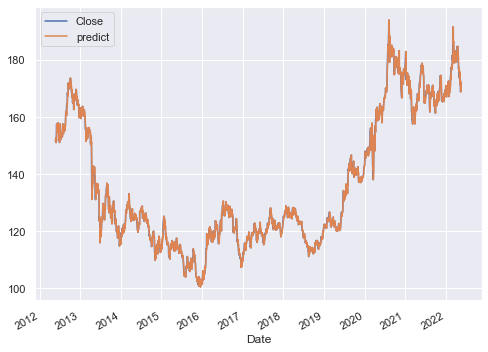

In [6]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
import yfinance as yf
sb.set()

SHEL = yf.download(tickers='SHEL.L', period='10y')
SHEL_close = pd.DataFrame(SHEL.Close, columns = ['Close'])
SHEL_close['lag_1'] = SHEL_close.Close.shift(1)
SHEL_close['lag_2'] = SHEL_close.Close.shift(2)
SHEL_close.dropna(inplace = True)
#print(SHEL_close)

lr = np.linalg.lstsq(SHEL_close[['lag_1', 'lag_2']], SHEL_close['Close'], rcond = None)[0]

SHEL_close['predict'] = np.dot(SHEL_close[['lag_1', 'lag_2']], lr)
SHEL_close['change'] = SHEL_close['predict'] / SHEL_close['Close']
SHEL_close[['Close', 'predict']].plot()